# MOD 5_PROJ
***
***

In [51]:
import warnings

def fxn():
    warnings.warn('deprecated', DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    fxn()

In [52]:
# import libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [53]:
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

In [54]:
wine= pd.read_csv(url, sep= ';')

***
***
# CLEANING/TRANSFORMATION
***
***

In [55]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


DUPLICATES

In [57]:
# check for duplicated entrees
wine.duplicated(keep= False).sum()

460

In [58]:
wine= wine.drop_duplicates(keep='first')
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1359 non-null float64
volatile acidity        1359 non-null float64
citric acid             1359 non-null float64
residual sugar          1359 non-null float64
chlorides               1359 non-null float64
free sulfur dioxide     1359 non-null float64
total sulfur dioxide    1359 non-null float64
density                 1359 non-null float64
pH                      1359 non-null float64
sulphates               1359 non-null float64
alcohol                 1359 non-null float64
quality                 1359 non-null int64
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


OUTLIERS

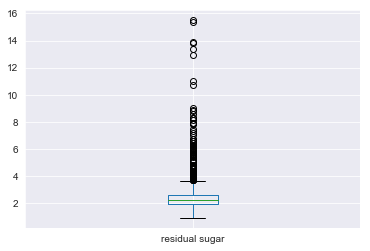

In [59]:
wine.boxplot(['residual sugar'])

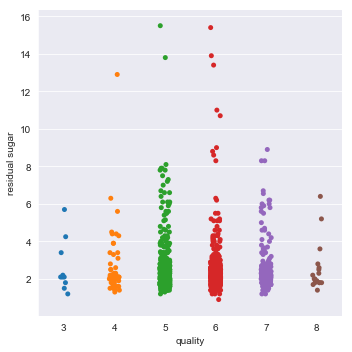

In [60]:
sns.catplot(data= wine, x='quality', y= 'residual sugar');
plt.savefig('sugar_outliers.png')

In [61]:
wine= wine[wine['residual sugar'] < 4]

In [62]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1252 non-null float64
volatile acidity        1252 non-null float64
citric acid             1252 non-null float64
residual sugar          1252 non-null float64
chlorides               1252 non-null float64
free sulfur dioxide     1252 non-null float64
total sulfur dioxide    1252 non-null float64
density                 1252 non-null float64
pH                      1252 non-null float64
sulphates               1252 non-null float64
alcohol                 1252 non-null float64
quality                 1252 non-null int64
dtypes: float64(11), int64(1)
memory usage: 127.2 KB


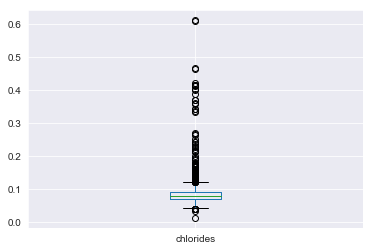

In [63]:
wine.boxplot(['chlorides'])
plt.savefig('chlor_outliers.png')

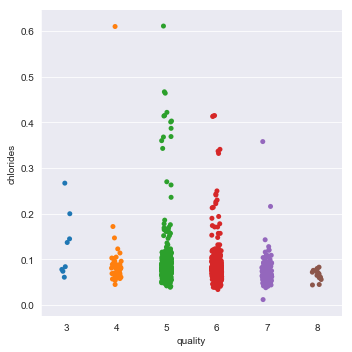

In [64]:
sns.catplot(data= wine, x='quality', y= 'chlorides');

In [65]:
wine= wine[wine['chlorides'] < .1]

In [66]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1069 non-null float64
volatile acidity        1069 non-null float64
citric acid             1069 non-null float64
residual sugar          1069 non-null float64
chlorides               1069 non-null float64
free sulfur dioxide     1069 non-null float64
total sulfur dioxide    1069 non-null float64
density                 1069 non-null float64
pH                      1069 non-null float64
sulphates               1069 non-null float64
alcohol                 1069 non-null float64
quality                 1069 non-null int64
dtypes: float64(11), int64(1)
memory usage: 108.6 KB


NULL VALUES

In [67]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [68]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.259977,0.691847,0.240304,0.245781,-0.143644,-0.098502,0.675318,-0.729757,0.182833,-0.157802,0.104810
volatile acidity,-0.259977,1.000000,-0.593182,0.022917,0.112251,-0.048014,0.066008,0.023305,0.262656,-0.344688,-0.183194,-0.395346
citric acid,0.691847,-0.593182,1.000000,0.164446,0.065290,-0.035816,0.029234,0.355445,-0.542057,0.283993,0.067118,0.238538
residual sugar,0.240304,0.022917,0.164446,1.000000,0.287053,0.050035,0.156328,0.397510,-0.108484,0.025308,0.019083,-0.019677
chlorides,0.245781,0.112251,0.065290,0.287053,1.000000,0.035528,0.169332,0.520876,-0.190059,-0.112545,-0.409948,-0.208760
free sulfur dioxide,-0.143644,-0.048014,-0.035816,0.050035,0.035528,1.000000,0.646290,-0.063850,0.089485,0.078226,-0.019386,-0.015408
total sulfur dioxide,-0.098502,0.066008,0.029234,0.156328,0.169332,0.646290,1.000000,0.068645,-0.018078,-0.045934,-0.200493,-0.185311
density,0.675318,0.023305,0.355445,0.397510,0.520876,-0.063850,0.068645,1.000000,-0.361764,0.097202,-0.609064,-0.222618
pH,-0.729757,0.262656,-0.542057,-0.108484,-0.190059,0.089485,-0.018078,-0.361764,1.000000,-0.054170,0.233180,-0.063230
sulphates,0.182833,-0.344688,0.283993,0.025308,-0.112545,0.078226,-0.045934,0.097202,-0.054170,1.000000,0.229660,0.410976


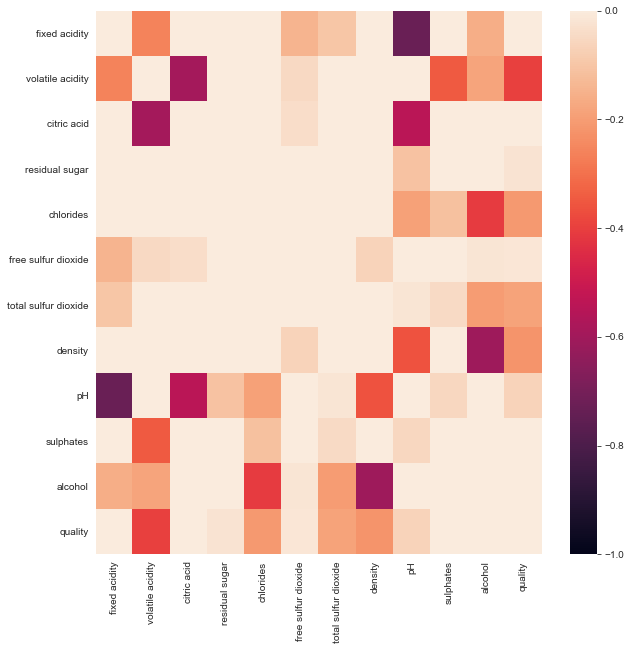

In [69]:
plt.figure(figsize= (10, 10))
sns.heatmap(wine.corr(), vmin= -1.0, vmax= 0.0)
plt.savefig('heatmap1.png')
plt.show()

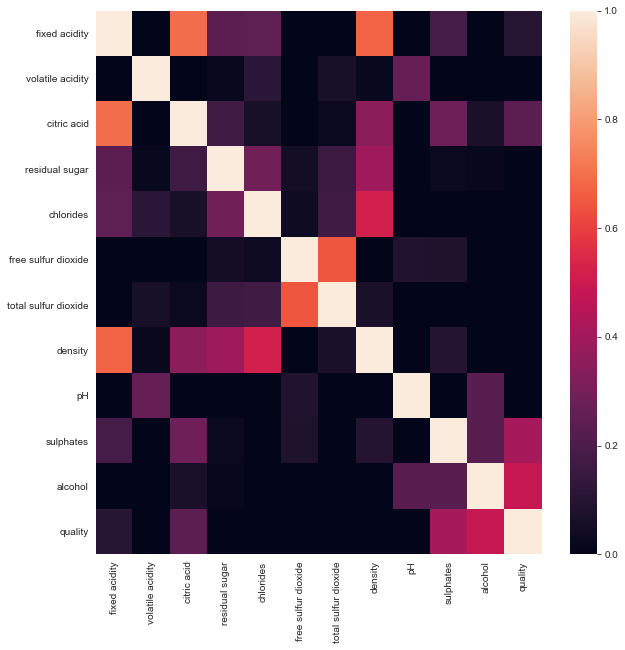

In [70]:
plt.figure(figsize= (10, 10))
sns.heatmap(wine.corr(), vmin= 0.0, vmax= 1.0)
plt.savefig('heatmap2.png')
plt.show()

<Figure size 720x720 with 0 Axes>

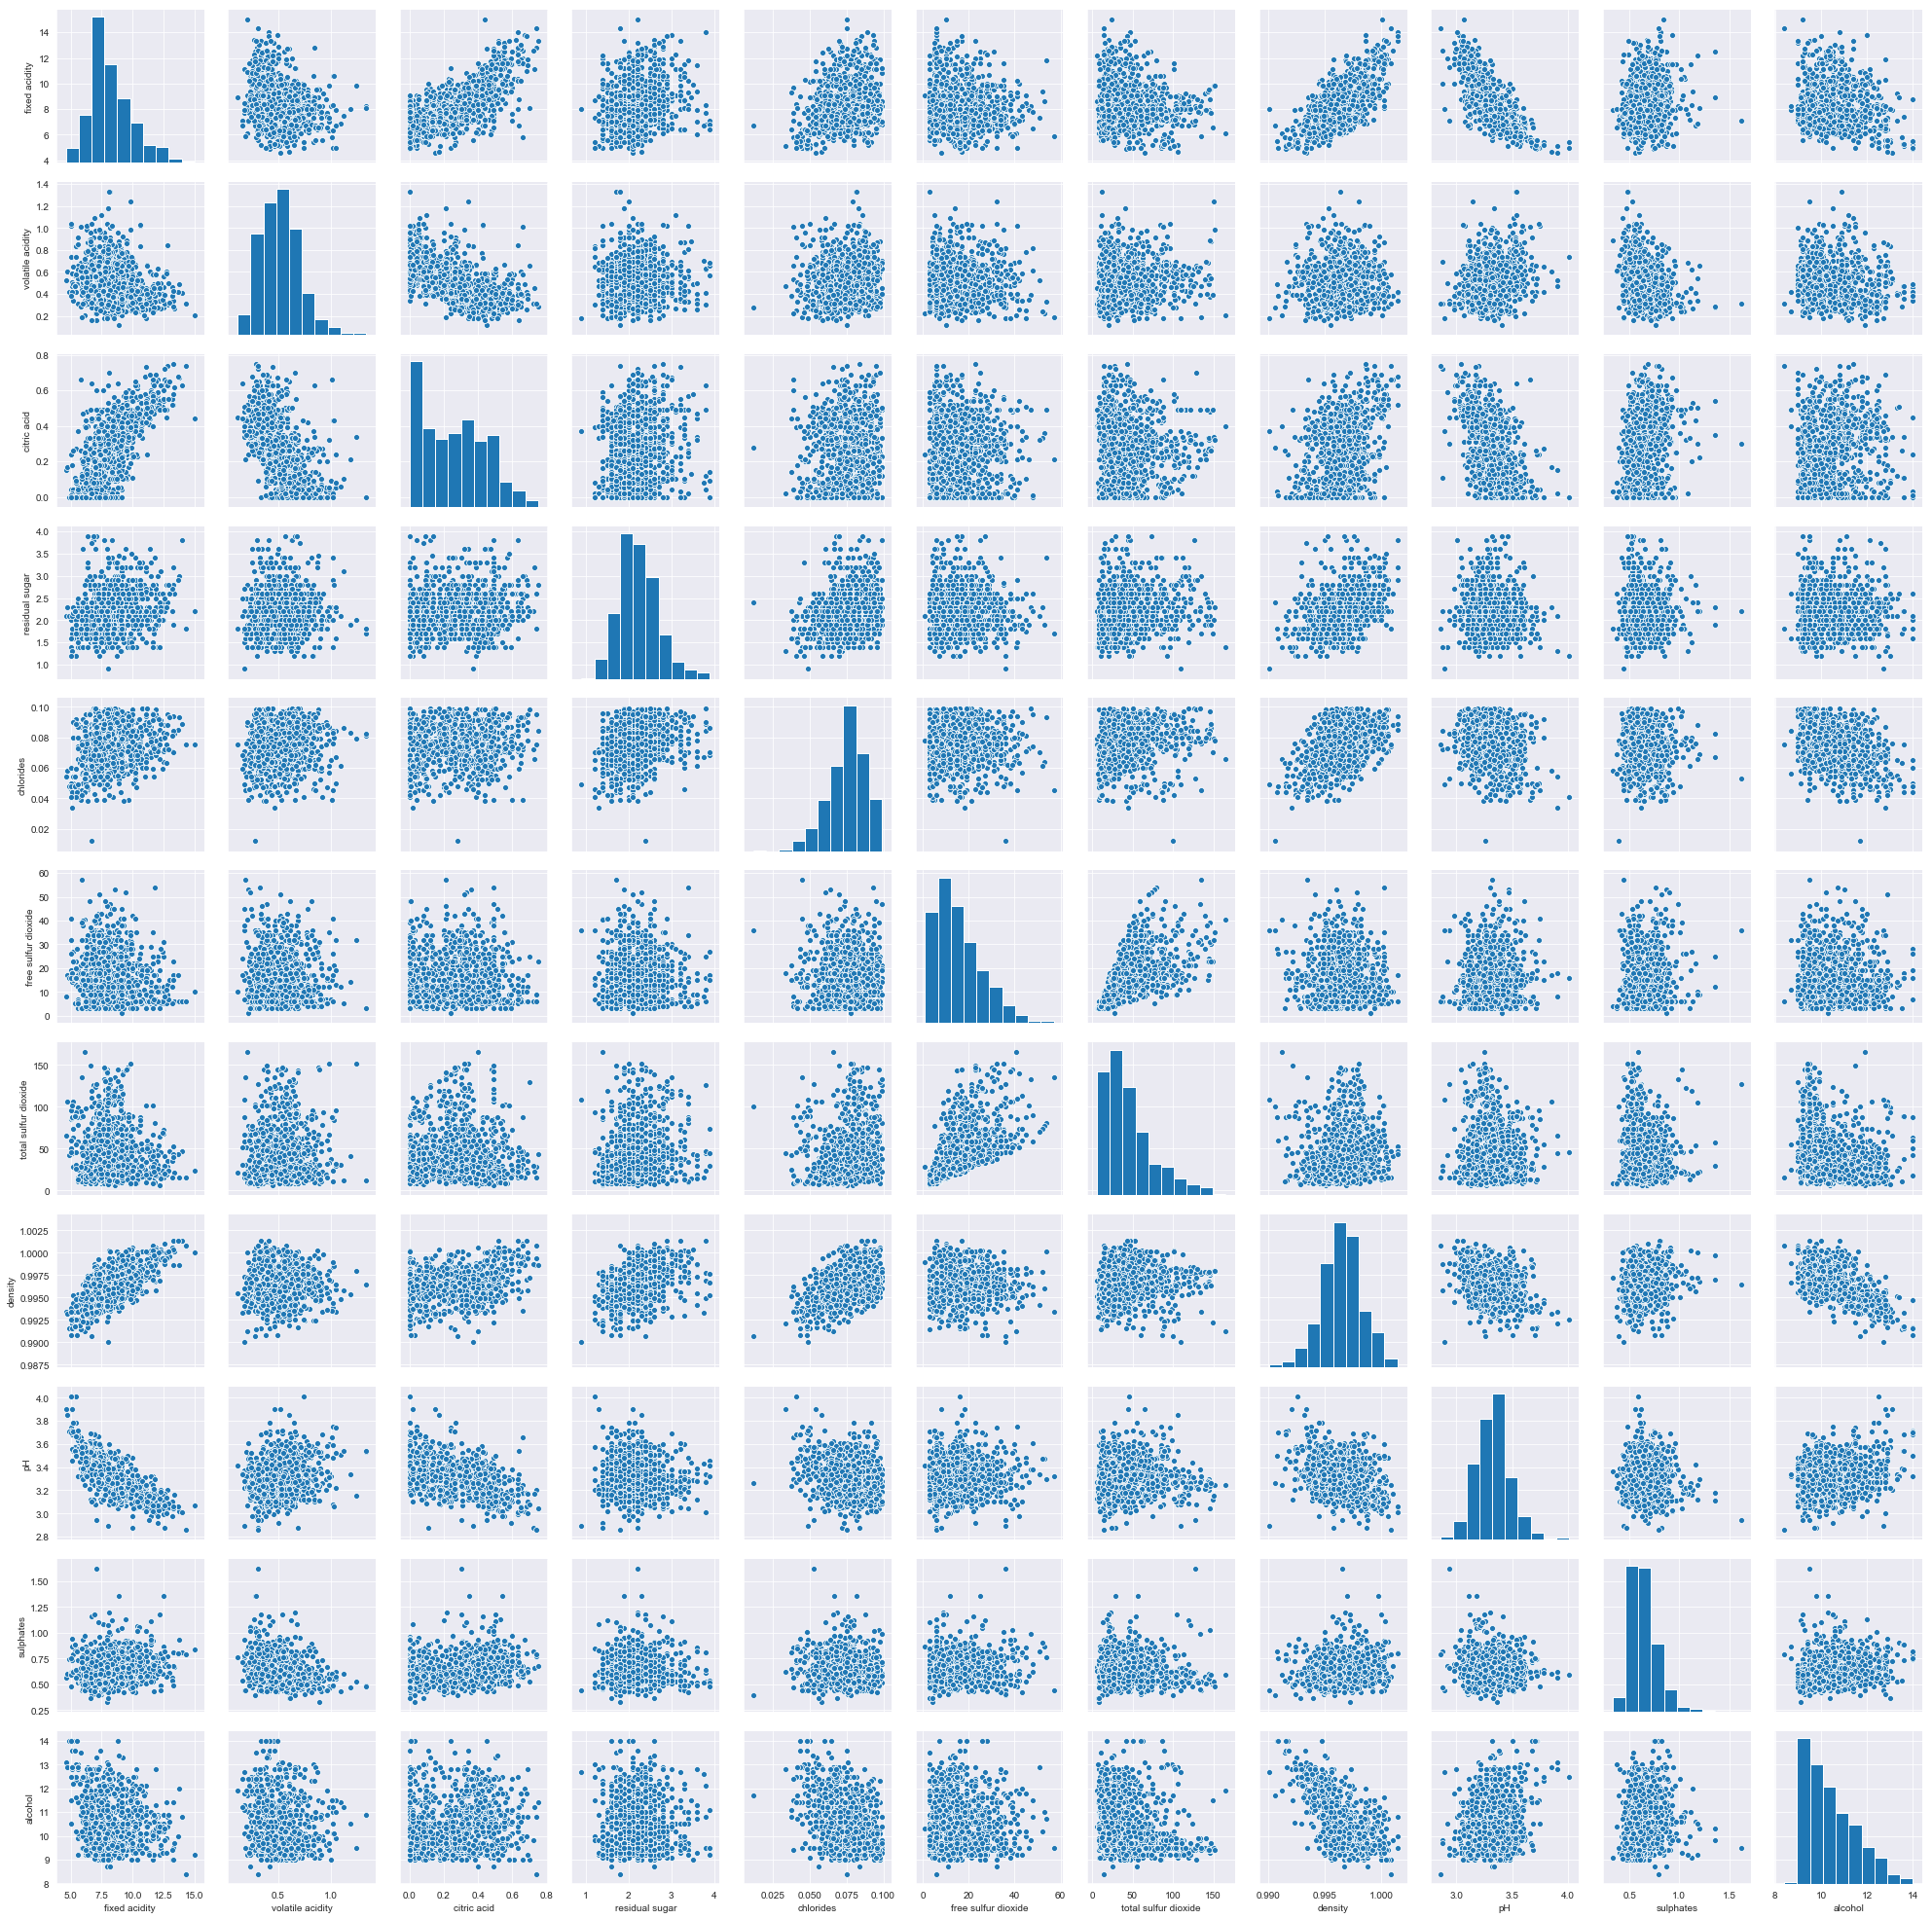

In [71]:
plt.figure(figsize= (10, 10))
sns.pairplot(wine.drop(['quality'], axis=1) )
plt.show()

***
***
# FEATURE ENGINEERING
***
***

In [72]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
wine['QUALITY']= np.where(wine['quality'] > 5, 1, 0)

In [74]:
X_base= wine.drop(['quality', 'QUALITY'], axis= 1)
y= wine.QUALITY

target variable
--------------------------------------------------------------------------------
QUALITY
0    480
1    589
Name: QUALITY, dtype: int64


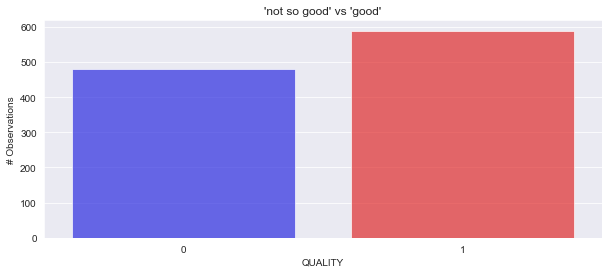

In [75]:
print('target variable')
print('--'*40)
print(wine.groupby(['QUALITY']).QUALITY.count())

plt.figure(figsize = (10,4))
sns.countplot(wine['QUALITY'], alpha =.66, palette= ['blue','red'])
plt.title('\'not so good\' vs \'good\'')
plt.ylabel('# Observations')
plt.savefig('balance.png')
plt.show()

In [76]:
pf2 = PolynomialFeatures(degree=2, interaction_only=False, include_bias= False)

X= pd.DataFrame(pf2.fit_transform(X_base), columns=pf2.get_feature_names(X_base.columns))

In [77]:
X_base.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [78]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,density^2,density pH,density sulphates,density alcohol,pH^2,pH sulphates,pH alcohol,sulphates^2,sulphates alcohol,alcohol^2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.995605,3.502278,0.558768,9.37932,12.3201,1.9656,32.994,0.3136,5.264,88.36
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.993610,3.189760,0.677824,9.76864,10.2400,2.1760,31.360,0.4624,6.664,96.04
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.994009,3.250220,0.648050,9.77060,10.6276,2.1190,31.948,0.4225,6.370,96.04
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.996004,3.153680,0.578840,9.78040,9.9856,1.8328,30.968,0.3364,5.684,96.04
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,...,0.995605,3.502278,0.558768,9.37932,12.3201,1.9656,32.994,0.3136,5.264,88.36


In [79]:
X.shape, y.shape

((1069, 77), (1069,))

***
***
# MODELING
***
***

In [80]:
# import
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

import xgboost as xgb

***
***
# BASIC MODEL
***
***

DECISION_TREE

In [32]:
# split
X_train, X_test, y_train, y_test= train_test_split(X_base, y, random_state= 999, test_size= .2)

# scale
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [33]:
X_train.shape

(855, 11)

In [34]:
%%time
# instantiate an estimator
tree= DecisionTreeClassifier()

# define parametrs
params= {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10, 2)
}

# instantiate a search
tree_search= GridSearchCV(estimator= tree, param_grid= params, cv=5, n_jobs= -1,  scoring= 'precision')

# train a model
tree_search.fit(X_train, y_train)

# print some charachteristics of model
print(tree_search.best_score_)
print('--'*20)
print(tree_search.best_params_)

# write a model to variable
M0= tree_search.best_estimator_
print(tree_search.best_estimator_)

# predict outputs
y_pred_train = tree_search.best_estimator_.predict(X_train)
y_pred = tree_search.best_estimator_.predict(X_test)

# assign report variables
# accuracy
M0_R1= accuracy_score(y_pred, y_test)
M0_R1T= accuracy_score(y_pred_train, y_train)

# precision
M0_R2= precision_score(y_pred, y_test)
M0_R2T= precision_score(y_pred_train, y_train)

# confusion matrix
M0_R3= confusion_matrix(y_pred, y_test)
M0_R3T= confusion_matrix(y_pred_train, y_train)

# classification report
M0_R4= classification_report(y_pred, y_test)
M0_R4T= classification_report(y_pred_train, y_train)


print(f'Train Accuracy: {M0_R1T*100}')
print(f'Test Accuracy: {M0_R1*100}')
print('--'*20)
print(f'Train Precision: {M0_R2T*100}')
print(f'Test Precision: {M0_R2* 100}')
print('--'*20)
print(f'Confusion Matrix:\n {M0_R3}')
print(f'Classification Report:\n {M0_R4}')

0.8300410350274701
----------------------------------------
{'criterion': 'entropy', 'max_depth': 3}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Train Accuracy: 74.85380116959064
Test Accuracy: 71.02803738317756
----------------------------------------
Train Precision: 71.70212765957447
Test Precision: 68.0672268907563
----------------------------------------
Confusion Matrix:
 [[71 38]
 [24 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       109
           1       0.68      0.77      0.72       105

    accuracy                           0.71       2

In [36]:
with open('base_model.pickle', 'wb') as file:
    pickle.dump(M0, file, pickle.HIGHEST_PROTOCOL)

***
***
NAIVE BAYES
***
***

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
# split
X_train, X_test, y_train, y_test= train_test_split(X_base, y, random_state= 999, test_size= .2)

# scale
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [39]:
X_train.shape

(855, 11)

In [47]:
%%time
# instantiate an estimator
nb= GaussianNB()

# train a model
nb.fit(X_train, y_train)





# predict outputs
y_pred_train = nb.predict(X_train)
y_pred = nb.predict(X_test)

# assign report variables
# accuracy
M00_R1= accuracy_score(y_pred, y_test)
M00_R1T= accuracy_score(y_pred_train, y_train)

# precision
M00_R2= precision_score(y_pred, y_test)
M00_R2T= precision_score(y_pred_train, y_train)

# confusion matrix
M00_R3= confusion_matrix(y_pred, y_test)
M00_R3T= confusion_matrix(y_pred_train, y_train)

# classification report
M00_R4= classification_report(y_pred, y_test)
M00_R4T= classification_report(y_pred_train, y_train)


print(f'Train Accuracy: {M00_R1T*100}')
print(f'Test Accuracy: {M00_R1*100}')
print('--'*20)
print(f'Train Precision: {M00_R2T*100}')
print(f'Test Precision: {M00_R2* 100}')
print('--'*20)
print(f'Confusion Matrix:\n {M00_R3}')
print(f'Classification Report:\n {M00_R4}')

Train Accuracy: 73.09941520467837
Test Accuracy: 77.10280373831776
----------------------------------------
Train Precision: 68.51063829787233
Test Precision: 71.42857142857143
----------------------------------------
Confusion Matrix:
 [[80 34]
 [15 85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.77       114
           1       0.71      0.85      0.78       100

    accuracy                           0.77       214
   macro avg       0.78      0.78      0.77       214
weighted avg       0.78      0.77      0.77       214

CPU times: user 21.4 ms, sys: 3.48 ms, total: 24.8 ms
Wall time: 22.8 ms


***
***
# KNN
***
***

(855, 1)
n: 1, precision score: 0.7413793103448276
(855, 2)
n: 2, precision score: 0.7964601769911505
(855, 3)
n: 3, precision score: 0.8018018018018018
(855, 4)
n: 4, precision score: 0.8165137614678899
(855, 5)
n: 5, precision score: 0.7981651376146789
(855, 6)
n: 6, precision score: 0.7807017543859649
(855, 7)
n: 7, precision score: 0.7909090909090909
(855, 8)
n: 8, precision score: 0.7317073170731707
(855, 9)
n: 9, precision score: 0.768595041322314
(855, 10)
n: 10, precision score: 0.7833333333333333


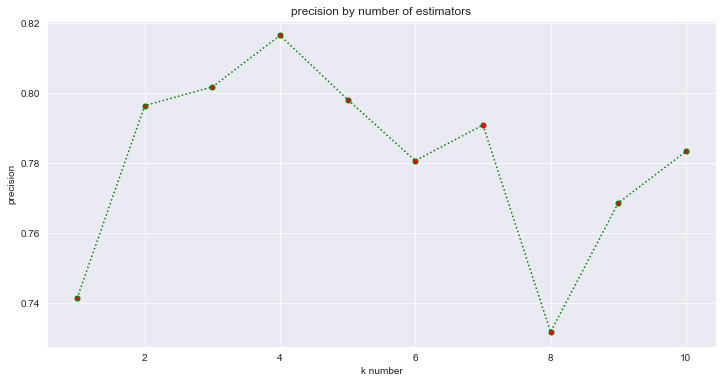

CPU times: user 3.59 s, sys: 106 ms, total: 3.69 s
Wall time: 24.8 s


In [61]:
%%time
# loop to find k
k_scores = []
k_range= range(1, 11)
for n in k_range:
    selector= SelectKBest(f_classif, k=n)
    X_new= selector.fit_transform(X, y)
        
    # split
    X_train, X_test, y_train, y_test= train_test_split(X_new, y, random_state= 999, test_size= .2)
    print(f'{X_train.shape}')

    # scale
    scaler= StandardScaler()
    X_train= scaler.fit_transform(X_train)
    X_test= scaler.fit_transform(X_test)
    
    # instantiate an estimator
    knn= KNeighborsClassifier()

    # define parametrs
    params= {
    'p': [1, 2],
    'n_neighbors': range(1, 100, 2)
    }

    # instantiate a search
    knn_search= GridSearchCV(estimator= knn, param_grid= params, cv=5, n_jobs= -1, scoring='precision')

    # train a model
    knn_search.fit(X_train, y_train)         
    
    y_pred = knn_search.predict(X_test)
    k_scores.append(precision_score(y_test, y_pred))
    print(f'n: {n}, precision score: {precision_score(y_test, y_pred)}')

# plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='green', linestyle=':', marker='o', markerfacecolor='red', markersize=5)
plt.title('precision by number of estimators')  
plt.xlabel('k number')  
plt.ylabel('precision')
plt.savefig('knn_performance.png')
plt.show()

In [62]:
k= k_scores.index(max(k_scores)) + 1

In [63]:
selector= SelectKBest(f_classif, k=k)
X_temp= selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]

print(list(selected_columns))
print('--'*20)
              
# split
X_train, X_test, y_train, y_test= train_test_split(X_temp, y, random_state= 999, test_size= .2)

# scale
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
    
# instantiate an estimator
knn= KNeighborsClassifier()

# define parametrs
param_grid= {
    'p': [1, 2],
    'n_neighbors': range(1, 100, 2)
}

# instantiate a search
knn_search= GridSearchCV(knn, param_grid= param_grid, cv=5, n_jobs= -1, scoring='precision')

# train a model
knn_search.fit(X_train, y_train)         

# print some charachteristics of model
print(knn_search.best_score_)
print('--'*20)
print(knn_search.best_params_)

# write a model to variable
M1= knn_search.best_estimator_
print(knn_search.best_estimator_)

# predict outputs
y_pred_train = knn_search.best_estimator_.predict(X_train)
y_pred = knn_search.best_estimator_.predict(X_test)

# assign report variables
# accuracy
M1_R1= accuracy_score(y_pred, y_test)
M1_R1T= accuracy_score(y_pred_train, y_train)

# precision
M1_R2= precision_score(y_pred, y_test)
M1_R2T= precision_score(y_pred_train, y_train)

# confusion matrix
M1_R3= confusion_matrix(y_pred, y_test)
M1_R3T= confusion_matrix(y_pred_train, y_train)

# classification report
M1_R4= classification_report(y_pred, y_test)
M1_R4T= classification_report(y_pred_train, y_train)


print(f'Training Accuracy: {M1_R1T*100}')
print(f'Test Accuracy: {M1_R1*100}')
print('--'*20)
print(f'Traing Precision: {M1_R2T*100}')
print(f'Test Precision: {M1_R2* 100}')
print('--'*20)
print(f'Confusion Matrix:\n {M1_R3}')
print(f'Classification Report:\n {M1_R4}')

['alcohol', 'density alcohol', 'sulphates alcohol', 'alcohol^2']
----------------------------------------
0.7639473366228781
----------------------------------------
{'n_neighbors': 21, 'p': 1}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=1,
                     weights='uniform')
Training Accuracy: 75.90643274853801
Test Accuracy: 76.63551401869158
----------------------------------------
Traing Precision: 79.57446808510639
Test Precision: 74.78991596638656
----------------------------------------
Confusion Matrix:
 [[75 30]
 [20 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       105
           1       0.75      0.82      0.78       109

    accuracy                           0.77       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.77      0.77      0.77       214



In [64]:
with open('knn_model.pickle', 'wb') as file:
    pickle.dump(M1, file, pickle.HIGHEST_PROTOCOL)

***
***
# RANDOM_FOREST
***
***

k: 1, precision score: 0.7244094488188977
k: 2, precision score: 0.7894736842105263
k: 3, precision score: 0.82
k: 4, precision score: 0.8350515463917526
k: 5, precision score: 0.803921568627451
k: 6, precision score: 0.7837837837837838
k: 7, precision score: 0.7876106194690266
k: 8, precision score: 0.6971830985915493
k: 9, precision score: 0.7981651376146789
k: 10, precision score: 0.819047619047619


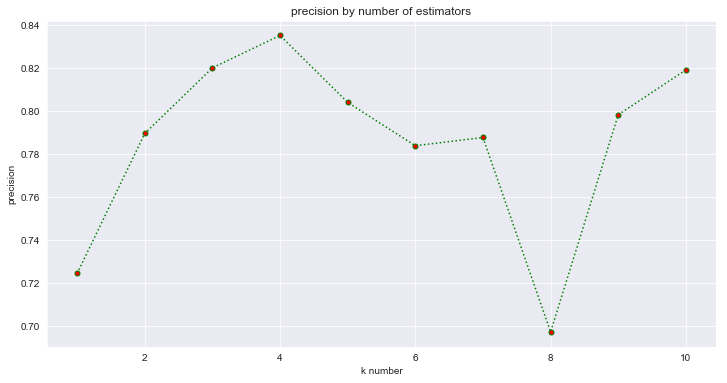

CPU times: user 1.29 s, sys: 46.2 ms, total: 1.33 s
Wall time: 6.26 s


In [65]:
%%time

# loop to find k
k_scores = []
k_range= range(1, 11)
for k in k_range:
    selector= SelectKBest(f_classif, k=k)
    X_temp= selector.fit_transform(X, y)
              
    # split
    X_train, X_test, y_train, y_test= train_test_split(X_temp, y, random_state= 999, test_size= .2)

    # scale
    scaler= StandardScaler()
    X_train= scaler.fit_transform(X_train)
    X_test= scaler.fit_transform(X_test)
    
    # instantiate an estimator
    rfc= RandomForestClassifier()

    param_grid = {
    'n_estimators': [5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3]
    }


    rfc_search = GridSearchCV(rfc, param_grid= param_grid, cv= 5, n_jobs= -1, scoring='precision')
    rfc_search.fit(X_train, y_train)       
    
    y_pred = rfc_search.predict(X_test)
    
    
    k_scores.append(precision_score(y_test, y_pred))
    print(f'k: {k}, precision score: {precision_score(y_test, y_pred)}')

# plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='green', linestyle=':', marker='o', markerfacecolor='red', markersize=5)
plt.title('precision by number of estimators')  
plt.xlabel('k number')  
plt.ylabel('precision')
plt.savefig('forest_performance.png')
plt.show()

In [66]:
k= k_scores.index(max(k_scores)) + 1

In [67]:
selector= SelectKBest(f_classif, k=k)
X_new= selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]

print(list(selected_columns))
print('--'*20)
              
# split
X_train, X_test, y_train, y_test= train_test_split(X_new, y, random_state= 999, test_size= .2)

# scale
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
    
# instantiate an estimator
rfc= RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 10, 15],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3]
    }


rfc_search = GridSearchCV(rfc, param_grid= param_grid, cv= 5, n_jobs= -1, scoring='precision')
rfc_search.fit(X_train, y_train)       

# print some charachteristics of model
print(rfc_search.best_score_)
print('--'*20)
print(rfc_search.best_params_)

# write a model to variable
M2= rfc_search.best_estimator_
print(rfc_search.best_estimator_)

# predict outputs
y_pred_train = rfc_search.best_estimator_.predict(X_train)
y_pred = rfc_search.best_estimator_.predict(X_test)

# assign report variables
# accuracy
M2_R1= accuracy_score(y_pred, y_test)
M2_R1T= accuracy_score(y_pred_train, y_train)

# precision
M2_R2= precision_score(y_pred, y_test)
M2_R2T= precision_score(y_pred_train, y_train)

# confusion matrix
M2_R3= confusion_matrix(y_pred, y_test)
M2_R3T= confusion_matrix(y_pred_train, y_train)

# classification report
M2_R4= classification_report(y_pred, y_test)
M2_R4T= classification_report(y_pred_train, y_train)


print(f'Training Accuracy: {M2_R1T*100}')
print(f'Test Accuracy: {M2_R1*100}')
print('--'*20)
print(f'Traing Precision: {M2_R2T*100}')
print(f'Test Precision: {M2_R2* 100}')
print('--'*20)
print(f'Confusion Matrix:\n {M2_R3}')
print(f'Classification Report:\n {M2_R4}')

['alcohol', 'density alcohol', 'sulphates alcohol', 'alcohol^2']
----------------------------------------
0.7739388096615355
----------------------------------------
{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 5}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Training Accuracy: 76.0233918128655
Test Accuracy: 73.83177570093457
----------------------------------------
Traing Precision: 73.19148936170212
Test Precision: 68.0672268907563
----------------------------------------
Confusion Matrix:
 [[77 38]
 [18 81]]
Classification Report:
          

In [68]:
with open('rfc_model.pickle', 'wb') as file:
    pickle.dump(M2, file, pickle.HIGHEST_PROTOCOL)

***
***
# XGBOOST
***
***

k: 1, precision score: 0.7520661157024794
k: 2, precision score: 0.794392523364486
k: 3, precision score: 0.7889908256880734
k: 4, precision score: 0.7889908256880734
k: 5, precision score: 0.7870370370370371
k: 6, precision score: 0.7798165137614679
k: 7, precision score: 0.7565217391304347
k: 8, precision score: 0.7478991596638656
k: 9, precision score: 0.8272727272727273
k: 10, precision score: 0.822429906542056


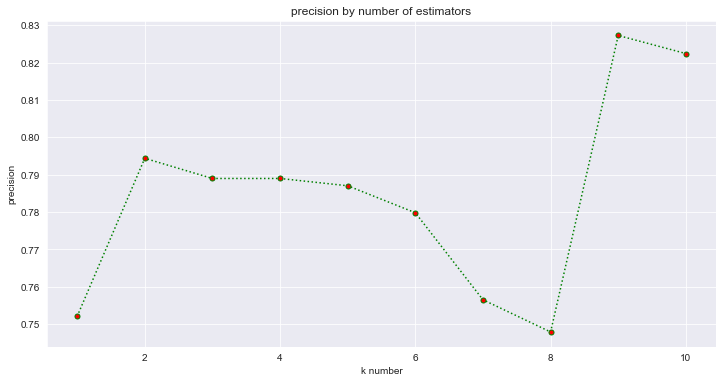

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
CPU times: user 19.5 s, sys: 607 ms, total: 20.1 s
Wall time: 4min 21s


In [81]:
%%time

# loop to find k
k_scores = []
k_range= range(1, 11)
for k in k_range:
    selector= SelectKBest(f_classif, k=k)
    X_temp= selector.fit_transform(X, y)

    # split
    X_train, X_test, y_train, y_test= train_test_split(X_temp, y, random_state=999, test_size= .2)

    # scale
    scaler= StandardScaler()
    X_train= scaler.fit_transform(X_train)
    X_test= scaler.fit_transform(X_test)
    
    # instantiate an estimator
    clf= xgb.XGBClassifier()

    param_grid = {
    "learning_rate": [.1, .3, .5],
    'max_depth': [1, 2, 3],
    'min_child_weight': [0, 5, 10],
    'subsample': [.25, .50, .75],
    'n_estimators': [50, 100, 200]
    }


    grid_clf = GridSearchCV(clf, param_grid= param_grid, cv= 5, n_jobs= -1, scoring='precision')
    grid_clf.fit(X_train, y_train)       
    
    y_pred = grid_clf.predict(X_test)
    
    
    k_scores.append(precision_score(y_test, y_pred))
    print(f'k: {k}, precision score: {precision_score(y_test, y_pred)}')

# plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='green', linestyle=':', marker='o', markerfacecolor='red', markersize=5)
plt.title('precision by number of estimators')  
plt.xlabel('k number')  
plt.ylabel('precision')
plt.savefig('xgb_performance.png')
plt.show()

print(clf)

In [82]:
k= k_scores.index(max(k_scores)) + 1

In [83]:
selector= SelectKBest(f_classif, k=k)
X_temp= selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
print(list(selected_columns))
print('--'*20)
              
# split
X_train, X_test, y_train, y_test= train_test_split(X_temp, y, random_state= 999, test_size= .2)

# scale
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
    
# instantiate an estimator
clf= xgb.XGBClassifier()

param_grid = {
    "learning_rate": [.1, .3, .5],
    'max_depth': [1, 2, 3],
    'min_child_weight': [0, 5, 10],
    'subsample': [.25, .50, .75],
    'n_estimators': [50, 100, 200]
    }


clf_search= GridSearchCV(clf, param_grid= param_grid, cv= 5, scoring='precision', n_jobs= -1)
clf_search.fit(X_train, y_train)     

# print some charachteristics of model
print(clf_search.best_score_)
print('--'*20)
print(clf_search.best_params_)

# write a model to variable
M3= clf_search.best_estimator_
print(clf_search.best_estimator_)

# predict outputs
y_pred_train = clf_search.best_estimator_.predict(X_train)
y_pred = clf_search.best_estimator_.predict(X_test)

# assign report variables
# accuracy
M3_R1= accuracy_score(y_pred, y_test)
M3_R1T= accuracy_score(y_pred_train, y_train)

# precision
M3_R2= precision_score(y_pred, y_test)
M3_R2T= precision_score(y_pred_train, y_train)

# confusion matrix
M3_R3= confusion_matrix(y_pred, y_test)
M3_R3T= confusion_matrix(y_pred_train, y_train)

# classification report
M3_R4= classification_report(y_pred, y_test)
M3_R4T= classification_report(y_pred_train, y_train)


print(f'Training Accuracy: {M3_R1T*100}')
print(f'Test Accuracy: {M3_R1*100}')
print('--'*20)
print(f'Traing Precision: {M3_R2T*100}')
print(f'Test Precision: {M3_R2* 100}')
print('--'*20)
print(f'Confusion Matrix:\n {M3_R3}')
print(f'Classification Report:\n {M3_R4}')

['sulphates', 'alcohol', 'volatile acidity chlorides', 'density sulphates', 'density alcohol', 'pH sulphates', 'pH alcohol', 'sulphates alcohol', 'alcohol^2']
----------------------------------------
0.7796305069594182
----------------------------------------
{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 50, 'subsample': 0.25}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.25, verbosity=1)
Training Accuracy: 80.46783625730994
Test Accuracy: 78.03738317757009
----------------------------------------
Traing Precision: 81.06382978723404
Test Precision: 76.4

In [84]:
with open('xgb_model.pickle', 'wb') as file:
    pickle.dump(M3, file, pickle.HIGHEST_PROTOCOL)

***
***
# SVC
***
***

k: 1, precision score: 0.8080808080808081
k: 2, precision score: 0.8155339805825242
k: 3, precision score: 0.8155339805825242
k: 4, precision score: 0.8155339805825242
k: 5, precision score: 0.8095238095238095
k: 6, precision score: 0.8037383177570093
k: 7, precision score: 0.8484848484848485
k: 8, precision score: 0.84
k: 9, precision score: 0.8316831683168316
k: 10, precision score: 0.8367346938775511


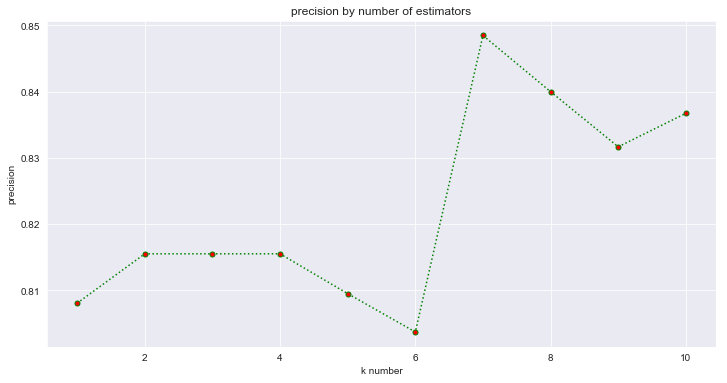

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
CPU times: user 1.16 s, sys: 45.1 ms, total: 1.2 s
Wall time: 4.93 s


In [73]:
%%time

k_scores= []
k_range= range(1, 11)
for n in k_range:
    
    selector= SelectKBest(f_classif, k=n)
    X_temp= selector.fit_transform(X, y)
              
    # split
    X_train, X_test, y_train, y_test= train_test_split(X_temp, y, random_state=999, test_size= .2)

    # scale
    scaler= StandardScaler()
    X_train= scaler.fit_transform(X_train)
    X_test= scaler.fit_transform(X_test)
    
    # instantiate an estimator
    svc= SVC()

    param_grid = {
    'C': [.1, .3, .5, .7, .9],
    'kernel': ['linear', 'poly', 'rbf']
    }


    svc_search = GridSearchCV(svc, param_grid= param_grid, cv= 5, n_jobs= -1, scoring='precision')
    svc_search.fit(X_train, y_train)       
    
    y_pred = svc_search.predict(X_test)
    
    
    k_scores.append(precision_score(y_test, y_pred))
    print(f'k: {n}, precision score: {precision_score(y_test, y_pred)}')

# plot
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='green', linestyle=':', marker='o', markerfacecolor='red', markersize=5)
plt.title('precision by number of estimators')  
plt.xlabel('k number')  
plt.ylabel('precision')
plt.savefig('svc_performance.png')
plt.show()

print(svc)

In [74]:
k= k_scores.index(max(k_scores)) + 1

In [75]:
selector= SelectKBest(f_classif, k=k)
X_temp= selector.fit_transform(X, y)

print(list(selected_columns))
print('--'*20)
              
# split
X_train, X_test, y_train, y_test= train_test_split(X_temp, y, random_state= 999, test_size= .2)

# scale
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)
    
# instantiate an estimator
svc= SVC()

param_grid = {
    'C': [.1, .3, .5, .7, .9],
    'kernel': ['linear', 'poly', 'rbf']
    }


svc_search = GridSearchCV(svc, param_grid= param_grid, cv= 5, n_jobs= -1, scoring='precision')
svc_search.fit(X_train, y_train)     

# print some charachteristics of model
print(svc_search.best_score_)
print('--'*20)
print(svc_search.best_params_)

# write a model to variable
M4= svc_search.best_estimator_
print(svc_search.best_estimator_)

# predict outputs
y_pred_train = svc_search.best_estimator_.predict(X_train)
y_pred = svc_search.best_estimator_.predict(X_test)

# assign report variables
# accuracy
M4_R1= accuracy_score(y_pred, y_test)
M4_R1T= accuracy_score(y_pred_train, y_train)

# precision
M4_R2= precision_score(y_pred, y_test)
M4_R2T= precision_score(y_pred_train, y_train)

# confusion matrix
M4_R3= confusion_matrix(y_pred, y_test)
M4_R3T= confusion_matrix(y_pred_train, y_train)

# classification report
M4_R4= classification_report(y_pred, y_test)
M4_R4T= classification_report(y_pred_train, y_train)


print(f'Training Accuracy: {M4_R1T*100}')
print(f'Test Accuracy: {M4_R1*100}')
print('--'*20)
print(f'Traing Precision: {M4_R2T*100}')
print(f'Test Precision: {M4_R2* 100}')
print('--'*20)
print(f'Confusion Matrix:\n {M4_R3}')
print(f'Classification Report:\n {M4_R4}')

['sulphates', 'alcohol', 'volatile acidity chlorides', 'density sulphates', 'density alcohol', 'pH sulphates', 'pH alcohol', 'sulphates alcohol', 'alcohol^2']
----------------------------------------
0.7931073638123962
----------------------------------------
{'C': 0.1, 'kernel': 'linear'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Training Accuracy: 73.33333333333333
Test Accuracy: 76.63551401869158
----------------------------------------
Traing Precision: 70.63829787234043
Test Precision: 70.58823529411765
----------------------------------------
Confusion Matrix:
 [[80 35]
 [15 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.70      0.76       115
           1       0.71      0.85      0.77        99

    accuracy    

In [76]:
with open('svc_model.pickle', 'wb') as file:
    pickle.dump(M4, file, pickle.HIGHEST_PROTOCOL)

***
***
# CONCLUSION
***
***

In [77]:
print('BASE_MODEL:')
print(f'ACCURACY SCORE: {M0_R1}')
print(f'PRECISION SCORE: {M0_R2}')
print(f'CONFUSION MATRIX:\n {M0_R3}')
print(f'CLASSIFICATION REPORT:\n {M0_R4}')
print('--'*20)
print('KNN:')
print(f'ACCURACY SCORE: {M1_R1}')
print(f'PRECISION SCORE: {M1_R2}')
print(f'CONFUSION MATRIX:\n {M1_R3}')
print(f'CLASSIFICATION REPORT:\n {M1_R4}')
print('--'*20)
print('RANDOM_FOREST:')
print(f'ACCURACY SCORE: {M2_R1}')
print(f'PRECISION SCORE: {M2_R2}')
print(f'CONFUSION MATRIX:\n {M2_R3}')
print(f'CLASSIFICATION REPORT:\n {M2_R4}')
print('--'*20)
print('XGB:')
print(f'ACCURACY SCORE: {M3_R1}')
print(f'PRECISION SCORE: {M3_R2}')
print(f'CONFUSION MATRIX:\n {M3_R3}')
print(f'CLASSIFICATION REPORT:\n {M3_R4}')
print('--'*20)
print('SVC:')
print(f'ACCURACY SCORE: {M4_R1}')
print(f'PRECISION SCORE: {M4_R2}')
print(f'CONFUSION MATRIX:\n {M4_R3}')
print(f'CLASSIFICATION REPORT:\n {M4_R4}')
print('--'*20)

BASE_MODEL:
ACCURACY SCORE: 0.7102803738317757
PRECISION SCORE: 0.680672268907563
CONFUSION MATRIX:
 [[71 38]
 [24 81]]
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       109
           1       0.68      0.77      0.72       105

    accuracy                           0.71       214
   macro avg       0.71      0.71      0.71       214
weighted avg       0.71      0.71      0.71       214

----------------------------------------
KNN:
ACCURACY SCORE: 0.7663551401869159
PRECISION SCORE: 0.7478991596638656
CONFUSION MATRIX:
 [[75 30]
 [20 89]]
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       105
           1       0.75      0.82      0.78       109

    accuracy                           0.77       214
   macro avg       0.77      0.77      0.77       214
weighted avg       0.77      0.77      0.77       214

-----------------------

In [78]:
max_results= [M0_R2, M1_R2, M2_R2, M3_R2, M4_R2]

In [82]:
print(f'{max_results.index(max(max_results))+ 1}')

4


PREDICT TWO WINES

In [88]:
def pick_wine(MODEL, WINE):
    '''
    Input:
    Output:
    '''
    temp= pf2.fit_transform(WINE)
    temp= selector.transform(temp)
    temp= scaler.fit_transform(temp)
    y= MODEL.predict(temp)
    return y

In [89]:
wine1= wine.iloc[3:4, 0:11]

In [95]:
wine2= wine.iloc[126:127, 0:11]

In [96]:
if pick_wine(M3, wine1) == 1:
    print('WINE_1 is good')
else:
    print('WINE_1 is not so good')

WINE_1 is good


In [97]:
if pick_wine(M3, wine2) == 1:
    print('WINE_2 is good')
else:
    print('WINE_2 is not so good')

WINE_2 is good
